## Our Features:

Pregnancies - Number of pregnancies

Glucose - 2-hour plasma glucose concentration in the oral glucose tolerance test

BloodPressure - Diastolic Blood Pressure

SkinThickness - Thickness of Skin

Insulin- 2-hour serum insulin

DiabetesPedigreeFunction -

BMI - Body Mass Index

Age - Age

Outcome - Diabetic ( 1 or 0 )

## Importing the Librabies

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [62]:
#Data Collection and Analysis
#PIMA Diabetes Dataset

In [63]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [64]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [66]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
#checking for null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

we have (768,9) data shape.
* it's good being columns already numerical and has no nan or missing values

# EDA

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [70]:
cols = ["Glucose","BloodPressure","Insulin","SkinThickness","BMI"]

In [71]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [72]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

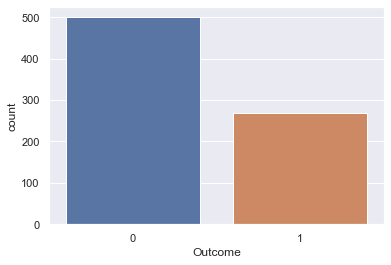

In [73]:
sns.countplot(x="Outcome",data=diabetes_dataset);

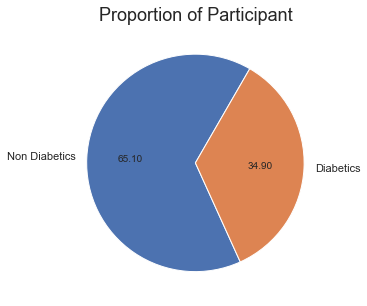

In [74]:
plt.figure(figsize=[5,5])
plt.pie(diabetes_dataset['Outcome'].value_counts(),labels = ['Non Diabetics','Diabetics'],autopct = '%.2f',
        startangle = 60)
plt.title('Proportion of Participant',fontsize = 18)
plt.show()

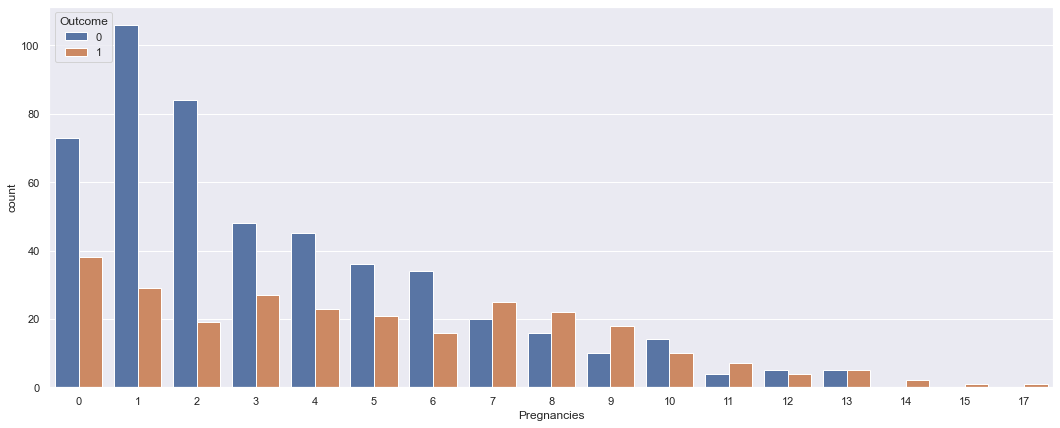

In [75]:
plt.figure(figsize = (18,7))
sns.countplot(x="Pregnancies",hue="Outcome",data=diabetes_dataset,);


most of people that have diabetes have no pregnancy cases before .....

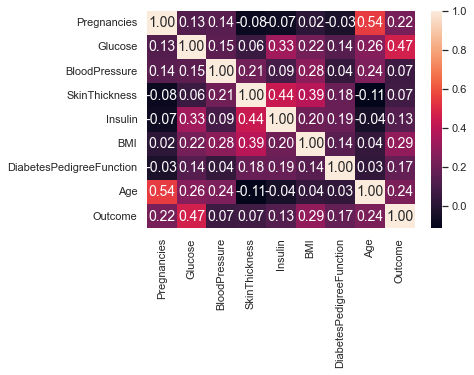

In [76]:
sns.heatmap(diabetes_dataset.corr(), annot=True, fmt='.2f', annot_kws={'fontsize':14});

In [77]:
#let's see the relation between each feature and the outcome column but by barplot this time..

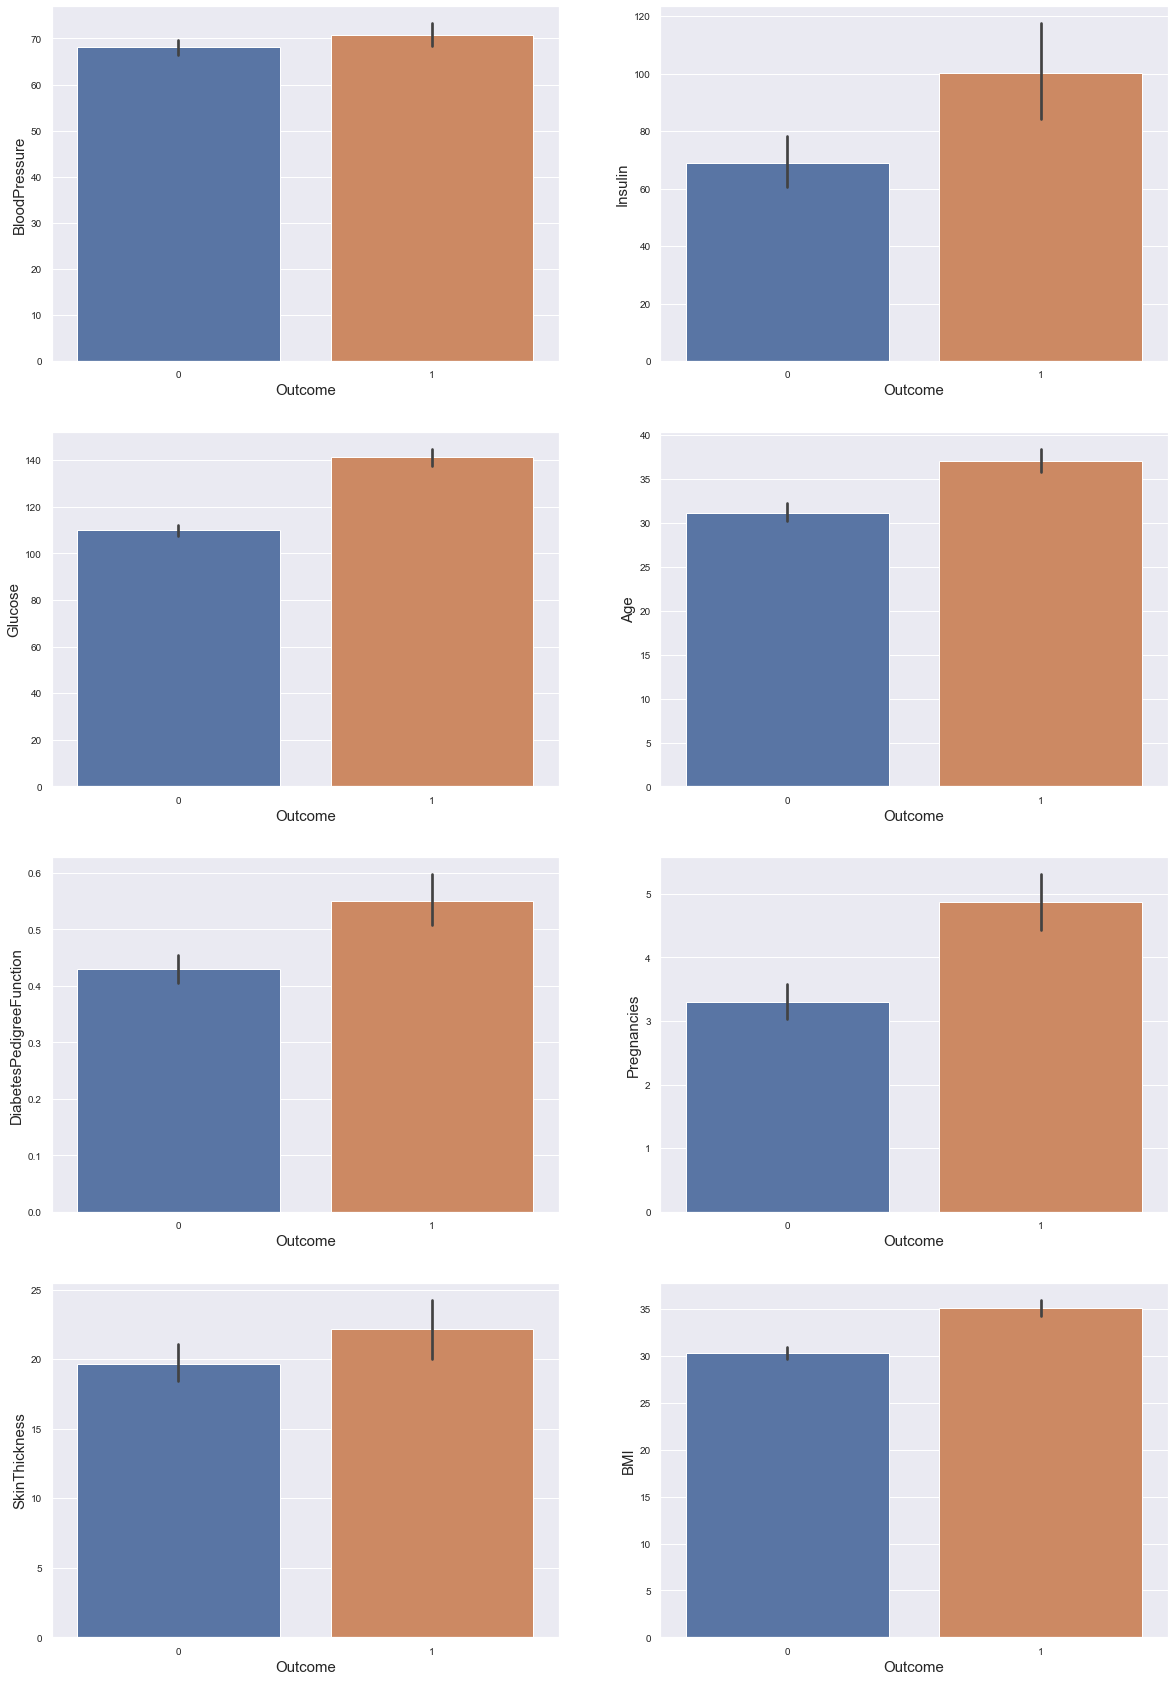

In [78]:
plt.figure(figsize=(20,30))
for i,col in enumerate(set(diabetes_dataset.columns)-{"Outcome"}):
    plt.subplot(4,2,i+1)
    sns.barplot(data=diabetes_dataset,x="Outcome",y=col,)
    plt.xlabel("Outcome", fontsize=15)
    plt.xticks(fontsize=10)
    plt.ylabel(col,fontsize=15)
    plt.yticks(fontsize=10)

We can see that all people that have diabetes also have high percentage of BloodPressure, BMI, Insulin, DiabetesPedigreeFunction, SkinThickness, Glucose and Pregnancies
also they are more older

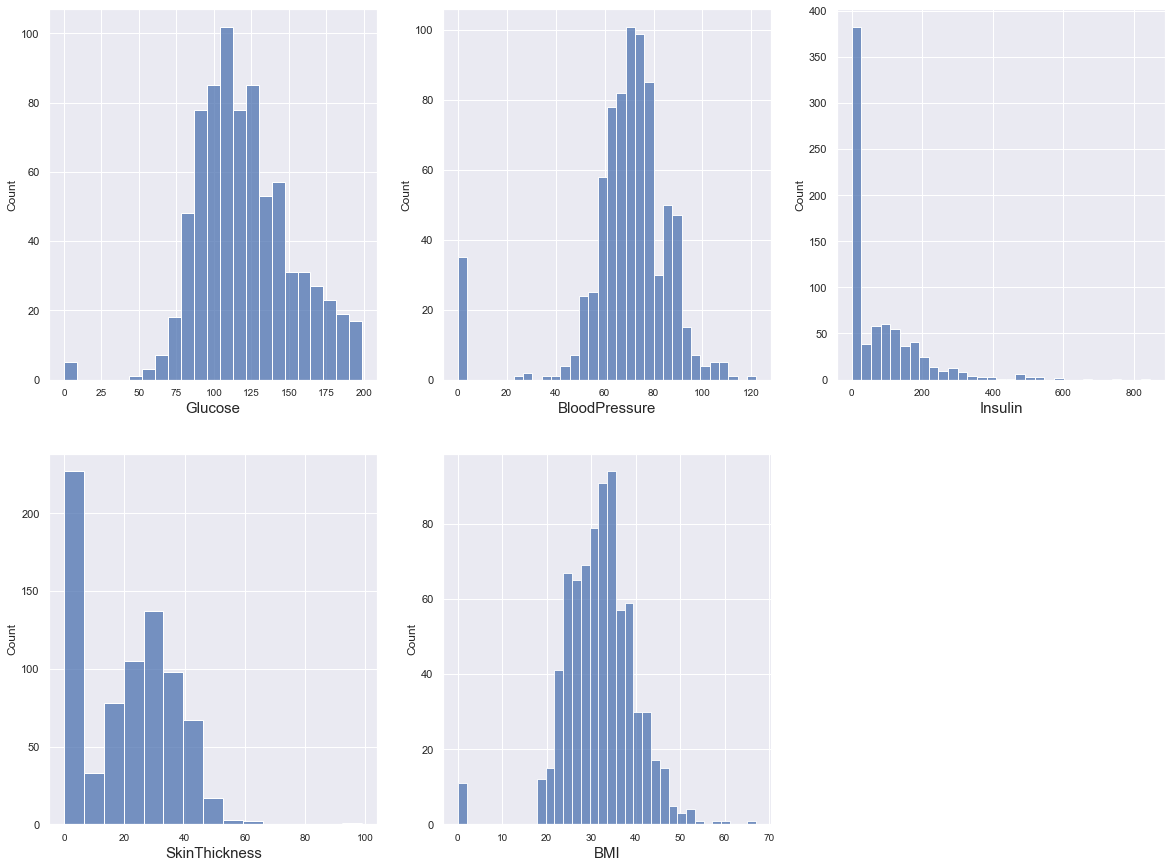

In [79]:
#see the type of our data distributions 
plt.figure(figsize=(20,15))
for i,col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.histplot(data=diabetes_dataset,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

Our Insights:

Glucose:
    - skweed to right 
    
BloodPressure:
    - looks normal 
    
SkinThickness:
    - skweed to right approximately 

BMI:
    - skweed to right 

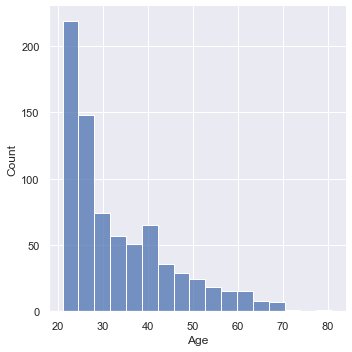

In [80]:
# age distribution
sns.displot(data = diabetes_dataset , x = diabetes_dataset['Age']);

From the graph above, we can conclude that people aged 20–30 represent the highest number of the data.

In [81]:
# for better understanding, we decided to
# create age in 4 categories
# 21-29, 30-39, 40-59, and 60+

bins = 20,30,40,60,85
labels = ['21-29', '30-39', '40-59', '60+']
age_range = pd.cut(diabetes_dataset['Age'],bins,labels = labels,include_lowest = True)

diabetes_dataset['age_range'] = age_range
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_range
0,6,148,72,35,0,33.6,0.627,50,1,40-59
1,1,85,66,29,0,26.6,0.351,31,0,30-39
2,8,183,64,0,0,23.3,0.672,32,1,30-39
3,1,89,66,23,94,28.1,0.167,21,0,21-29
4,0,137,40,35,168,43.1,2.288,33,1,30-39
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60+
764,2,122,70,27,0,36.8,0.340,27,0,21-29
765,5,121,72,23,112,26.2,0.245,30,0,21-29
766,1,126,60,0,0,30.1,0.349,47,1,40-59


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


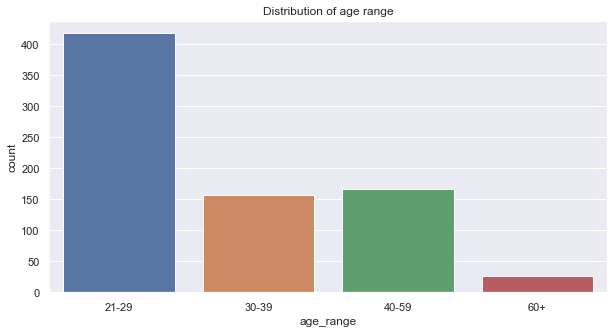

In [82]:
plt.figure(figsize = (10,5))
sns.countplot(diabetes_dataset['age_range'])
plt.title('Distribution of age range')
plt.show()

This graph support the previous statement that people under 30 represent as the biggest number of participant in the data.

Text(0.5, 1.0, 'Age Range By Outcome ')

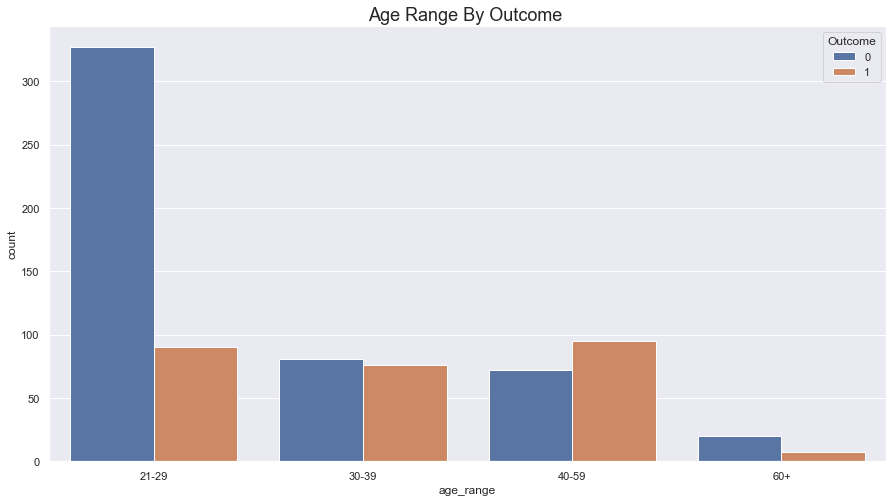

In [83]:
# outcome result per group of age

plt.figure(figsize = (15,8))
sns.set_theme(style="darkgrid")
sns.countplot(x = diabetes_dataset['age_range'],hue = 'Outcome',data = diabetes_dataset)
plt.title('Age Range By Outcome ',fontsize = 18)

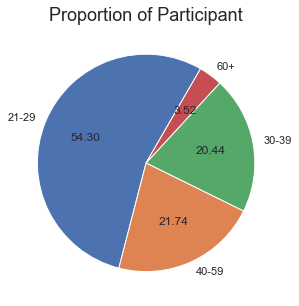

21-29    417
40-59    167
30-39    157
60+       27
Name: age_range, dtype: int64

In [84]:
plt.figure(figsize=[5,5])
plt.pie(diabetes_dataset['age_range'].value_counts(),labels = ['21-29', '40-59', '30-39', '60+'],autopct = '%.2f',
        startangle = 60)
plt.title('Proportion of Participant',fontsize = 18)
plt.show()

diabetes_dataset["age_range"].value_counts()

In [85]:
cross = pd.crosstab(diabetes_dataset['age_range'], 
            diabetes_dataset['Outcome'], 
            margins = True, 
            margins_name = "proportion", 
            normalize='index')
display(cross)

Outcome,0,1
age_range,,
21-29,0.784173,0.215827
30-39,0.515924,0.484076
40-59,0.431138,0.568862
60+,0.740741,0.259259
proportion,0.651042,0.348958


In [86]:
# separating the data and labels
X = diabetes_dataset.drop(['Outcome','age_range'], axis=1)
Y = diabetes_dataset['Outcome']

In [87]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [88]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data Standardization

In [89]:
#If the range of features are different it is difficult to predict ,so we standardize the values here we use standardscaler

In [90]:
scaler = StandardScaler()

In [91]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [92]:
scaler.fit(X)

StandardScaler()

In [93]:
standardized_data = scaler.transform(X)

In [94]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [95]:
X = standardized_data
Y = diabetes_dataset['Outcome']

### Train Test Split

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [97]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the Model

In [98]:
classifier = svm.SVC(kernel='linear')

In [99]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

#### Model Evaluation

In [100]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [101]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [102]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [103]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


### Making a Predictive System

In [104]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
